In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, InputLayer

2025-01-16 15:31:45.979555: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737021705.992496  432381 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737021705.996232  432381 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 15:31:46.011004: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X, y = make_moons(n_samples=250, noise=0.05)

X.shape, y.shape

((250, 2), (250,))

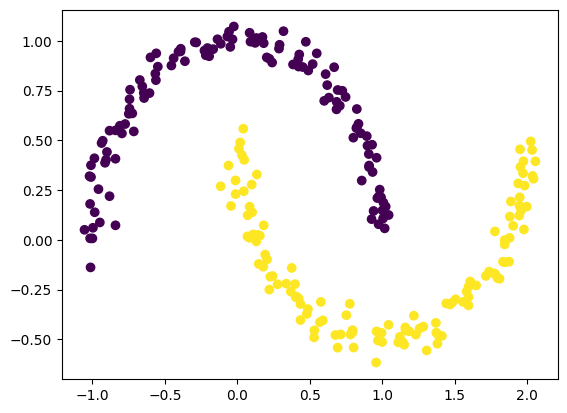

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Vanishing Gradient Problem

In [27]:
model = Sequential()

# making a deep neural network - 10 hidden layers say
# activation function either sigmoid or tanh

# Input Layer
model.add(InputLayer(shape=(2, )))

# 10 Hidden Layers
model.add(Dense(units=10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))

# Output Layer
model.add(Dense(1, activation="sigmoid"))

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,031 (4.03 KB)

 Trainable params: 1,031 (4.03 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Getting weights going into layer 1

old_weights, old_biases = model.layers[0].get_weights()
old_weights, old_biases

(array([[ 0.21468693,  0.43933398, -0.05066019, -0.43599716,  0.58494216,
          0.1370902 ,  0.5979795 ,  0.21397835, -0.49064732,  0.67511445],
        [ 0.0902856 ,  0.6892827 , -0.43886468,  0.5233504 , -0.3932793 ,
          0.2948597 ,  0.6139849 ,  0.33265036, -0.34056205,  0.7011567 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [32]:
model.fit(X, y, epochs=1)

E0000 00:00:1736717716.268681   21574 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1736717716.307348   21574 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-01-13 03:05:16.312395: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at xla_ops.cc:577 : FAILED_PRECONDITION: DNN library initialization failed. Look at the er

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib64/python3.12/runpy.py", line 198, in _run_module_as_main

  File "/usr/lib64/python3.12/runpy.py", line 88, in _run_code

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib64/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib64/python3.12/asyncio/base_events.py", line 1986, in _run_once

  File "/usr/lib64/python3.12/asyncio/events.py", line 88, in _run

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_21494/626282053.py", line 1, in <module>

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/ree/python_venv/ML/lib64/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_9554]